## Yash Bhadiyadra - Data Science Intern at CodeClause

### Task: 1 - Movies Datasets Analysis

### LinkedIn profile: https://www.linkedin.com/in/yashbhadiyadra

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Data

In [2]:
df = pd.read_csv("imdb_1000.csv")

In [3]:
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


## Getting an overview of the dataset

In [4]:
df.isnull().sum()         #checking for null values in any column

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

- Content rating column has 3 missing values

In [5]:
df.info()  #Getting information on number of rows, columns and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


- 979 rows and 6 columns
- 1 float and 1 numeric column
- rest 4 are object columns

In [6]:
df.describe(include = 'all')     #summary statistics

,star_rating,title,content_rating,genre,duration,actors_list
count,979.000000,979,976,979,979.000000,979
unique,NaN,975,12,16,NaN,969
top,NaN,Dracula,R,Drama,NaN,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,NaN,2,460,278,NaN,6
mean,7.889785,NaN,NaN,NaN,120.979571,NaN
std,0.336069,NaN,NaN,NaN,26.218010,NaN
min,7.400000,NaN,NaN,NaN,64.000000,NaN
25%,7.600000,NaN,NaN,NaN,102.000000,NaN
50%,7.800000,NaN,NaN,NaN,117.000000,NaN
75%,8.100000,NaN,NaN,NaN,134.000000,NaN


- star rating ranges from 7.4 to 9.3 and seems to be normally distributed with mean and median fairly close to each other
- title of movie is unqiue except for 'The Girl with the Dragon' which comes twice
- Content rating is categorical with 3 missing values and 12 unquie types of rating
- there are 16 types of genres with drama appearing the most number of times
- duration of movie ranges from 64 to 242 and seems to be rightly skewed
- actors list column has actors from each movie collected in form of lists with one group of actors appearing together on 6 different occasions

### Treating Missing value in content_rating column

In [7]:
#let's first treat the missing values of content_rating

df[df.content_rating.isnull()]

#only 3 missing values hence we drop those rows

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [8]:
df.dropna(inplace= True)

In [9]:
df.content_rating.isnull().any()
#no more null values

False

## Exploring Patterns in the data 

In [10]:
df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

### Checking the distribution of star_rating column

<AxesSubplot:>

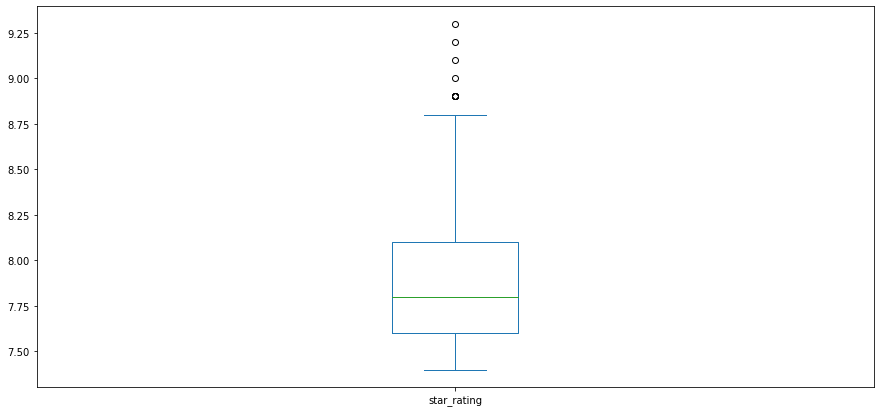

In [11]:
df.star_rating.plot(kind = 'box', figsize = (15,7))

- there is not much spread in star rating
- few outliers are there above 8.75 which can be further investigated to see which movies have such high ratings

In [12]:
#highest ranked movies

df[df.star_rating > 8.75] 

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


- 14 movies have rating above 8.75
- 'The Shawshank Redemption' is the highest rated movie - 9.3 rating lasting 2hours 22 mins
- duration is mostly greater than 140 mins for high rated movies


### Checking Pattern between star rating and duration of movies

<AxesSubplot:xlabel='duration', ylabel='star_rating'>

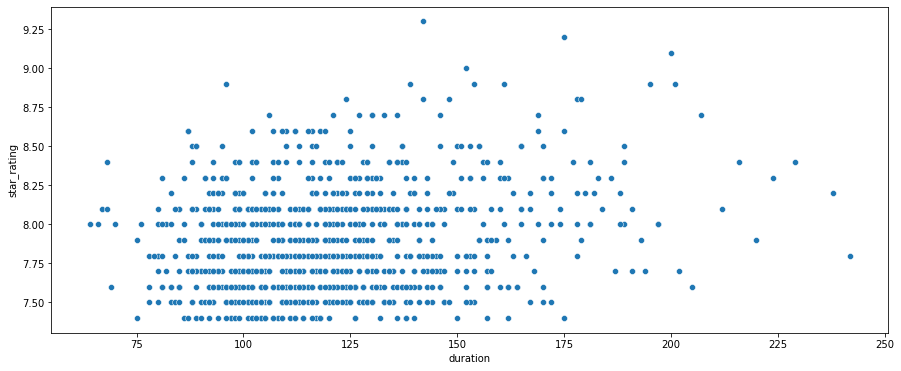

In [13]:
plt.figure(figsize = (15,6))
sns.scatterplot(x = 'duration', y = 'star_rating', data = df)

- ratings are mostly concentrated between 7.5 and 8.3
- there is no clear pattern which can be seen here
- higher ratings mostly occur for movies with duration between 140 mins and 160 mins
- for movies beyond 215 mins ratings are not so high

### Checking Pattern between star rating and genres of movies

<AxesSubplot:xlabel='genre', ylabel='star_rating'>

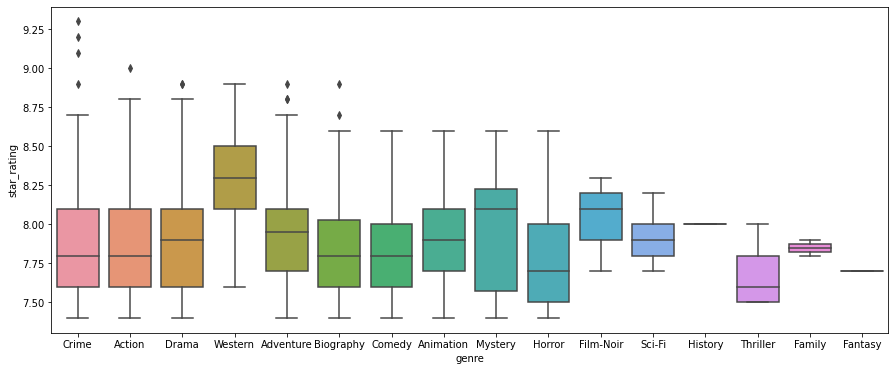

In [14]:
plt.figure(figsize = (15,6))
sns.boxplot(x = 'genre', y = 'star_rating', data = df)

- there are outliers in Crime, Action, Drama , Adventure and Biography genres
- The median rating for Western genres is very high compared to others and its lowest is also least
- History and Fantasy have just one movies each under their genres
- median ratings for Mystery and Film-Noir are also quite high
- Family has the least spread with an exact normal distribution
- Crime genre is the only genre which has most 9 above ratings; Action has one above 9
- So mostly movies with >9 ratings belong to genre Crime

In [15]:
#checking movies with star_rating > 9 

df[df.star_rating >= 9]              

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


- Top 3 are crime movies with duration > 140 but < 215

### Checking Pattern between star rating and content rating of movies

<AxesSubplot:>

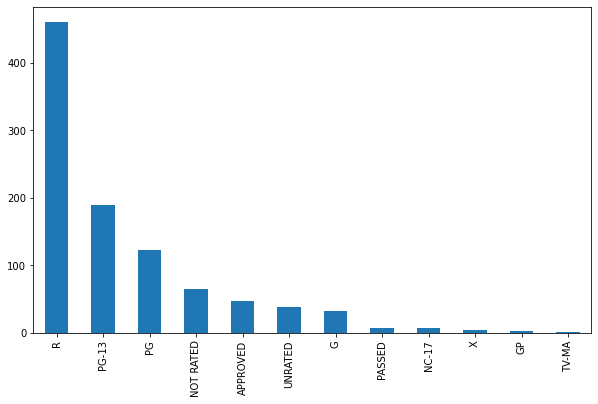

In [16]:
#for this let's first check content_rating column

df.content_rating.value_counts().plot(kind = 'bar', figsize = (10,6))

In [17]:
#Not sure about the terms here but we can see R is highest occurring category

<AxesSubplot:xlabel='content_rating', ylabel='star_rating'>

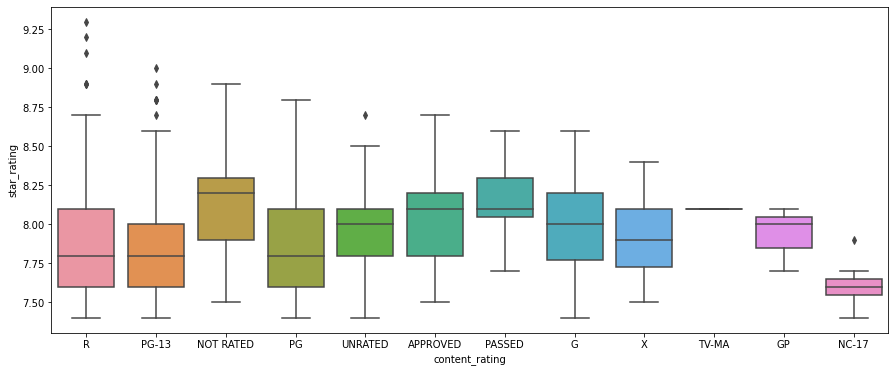

In [18]:
plt.figure(figsize = (15,6))
sns.boxplot(x='content_rating', y ='star_rating', data = df)

- Outliers appear for R, PG-13 and UNRATED
- median star rating corresponding to NOT RATED content rating is highest that content which is not rated has a higher average star rating amongst others
- NOT RATED also has highest star rating except when outliers are not considered
- NC-17 content rated has very low star ratings
- for PASSED content rating, 75% movies have star -rating > 8
- the spread for R content rating is very high especially for the latter 50% observations

### Checking Pattern between content rating and duration of movies

<AxesSubplot:xlabel='content_rating', ylabel='duration'>

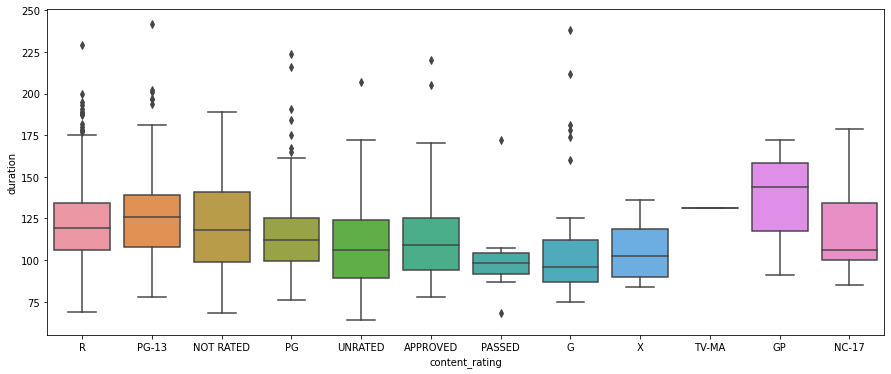

In [19]:
plt.figure(figsize = (15,6))
sns.boxplot(x= 'content_rating', y = 'duration', data = df)

- Content rating GP has a very high median duration value among others and ranges between 100 and 175 mins
- Mostly PASSED content rated movies do not last even for 2 hours except for an outlier. Also, PASSED content movie has the lowest running movie of slightly higher than an hour
- similarly most G content rated movies last little longer than 2 hours while few last nearly 4 hours
- One of PG-13 rated movie is the longest running movie
- NOT RATED movies have a huge spread between 65 to 190 mins 
- PASSED, G, X and TV-MA all have movies ranging between 75 -130 mins

### Checking Pattern between duration and genres of movies

<AxesSubplot:xlabel='genre', ylabel='duration'>

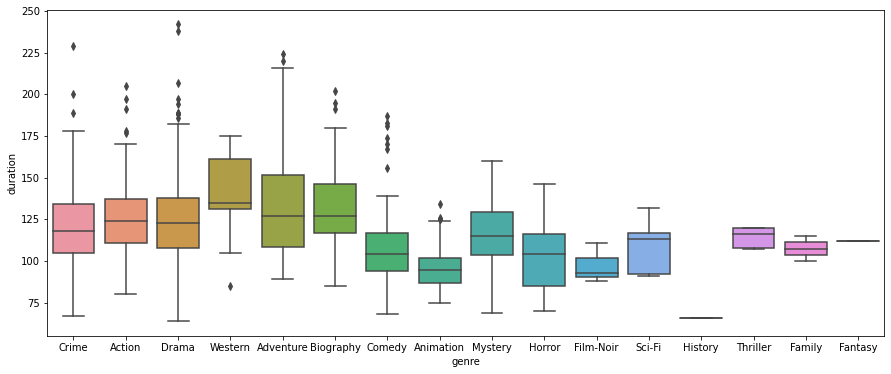

In [20]:
plt.figure(figsize = (15,6))
sns.boxplot(x= 'genre', y = 'duration', data = df)

- Film-Noir, Thriller, Family and Fantasy all are within 2 hours' movies
- Western genre movies mostly range between 110 mins and 175 mins except for one movie which is around 80-90 mins. It has the highest median duration time among all genres
- The longest running movies fall under Drama followed by Crime and Adventure
- Drama genre movies range between 1 hour long to 3 hour long and few even 3.5-4 hour long

### Exploring the actors appearing in the movies

In [21]:
#first 5 rows of actors_list column

df.actors_list.head()

0    [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1      [u'Marlon Brando', u'Al Pacino', u'James Caan']
2    [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3    [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4    [u'John Travolta', u'Uma Thurman', u'Samuel L....
Name: actors_list, dtype: object

In [22]:
#u' is present which makes no sense. we can get rid of it

df.actors_list = df.actors_list.apply(lambda x:x.replace("u'",''))

In [23]:
#let's also get rid off '
df.actors_list = df.actors_list.apply(lambda x:x.replace("'",''))

In [24]:
df.actors_list.head() #we got rid off the u' and '. Now we just have the names separated by commas and have []

0          [Tim Robbins, Morgan Freeman, Bob Gunton]
1             [Marlon Brando, Al Pacino, James Caan]
2         [Al Pacino, Robert De Niro, Robert Duvall]
3      [Christian Bale, Heath Ledger, Aaron Eckhart]
4    [John Travolta, Uma Thurman, Samuel L. Jackson]
Name: actors_list, dtype: object

In [25]:
#let's also get rid off []
df.actors_list = df.actors_list.apply(lambda x:x.replace("[",''))

df.actors_list = df.actors_list.apply(lambda x:x.replace("]",''))

### I guess we can also pass all these replaceable strings in a list and replace them at the same time

In [26]:
df.actors_list.head()

0          Tim Robbins, Morgan Freeman, Bob Gunton
1             Marlon Brando, Al Pacino, James Caan
2         Al Pacino, Robert De Niro, Robert Duvall
3      Christian Bale, Heath Ledger, Aaron Eckhart
4    John Travolta, Uma Thurman, Samuel L. Jackson
Name: actors_list, dtype: object

- All cleaning and processing of actors_list column done

In [27]:
#splitting actors_list into individual series and storing together in a dataframe object called names

names = df.actors_list.apply(lambda x:pd.Series(x.split(','))) 
names.head()


,0,1,2
0,Tim Robbins,Morgan Freeman,Bob Gunton
1,Marlon Brando,Al Pacino,James Caan
2,Al Pacino,Robert De Niro,Robert Duvall
3,Christian Bale,Heath Ledger,Aaron Eckhart
4,John Travolta,Uma Thurman,Samuel L. Jackson


#### Combining names data frame with other columns of original data frame to study few patterns in actors

In [28]:
actor_df = pd.concat([df.star_rating,df.content_rating,df.genre,df.duration,names], axis = 1)
actor_df.head()

,star_rating,content_rating,genre,duration,0,1,2
0,9.3,R,Crime,142,Tim Robbins,Morgan Freeman,Bob Gunton
1,9.2,R,Crime,175,Marlon Brando,Al Pacino,James Caan
2,9.1,R,Crime,200,Al Pacino,Robert De Niro,Robert Duvall
3,9.0,PG-13,Action,152,Christian Bale,Heath Ledger,Aaron Eckhart
4,8.9,R,Crime,154,John Travolta,Uma Thurman,Samuel L. Jackson


In [29]:
#rename the columns 0,1 and 2
actor_df.rename(columns = {0:'actor_1', 1:'actor_2', 
                              2:'actor_3'}, inplace = True)

In [30]:
#we now want the actor columns to be melted into 1 so that we can visualise easily
#(actor_df.actor_1.append(actor_df.actor_2).append(actor_df.actor_3)).reset_index(drop = True)

newdf = (actor_df.melt(id_vars=['star_rating','content_rating','genre','duration'],
                       value_vars = ['actor_1', 'actor_2', 'actor_3'],
                 value_name='Actor')).drop('variable', axis = 1)
newdf.head()

,star_rating,content_rating,genre,duration,Actor
0,9.3,R,Crime,142,Tim Robbins
1,9.2,R,Crime,175,Marlon Brando
2,9.1,R,Crime,200,Al Pacino
3,9.0,PG-13,Action,152,Christian Bale
4,8.9,R,Crime,154,John Travolta


### Actors with most number of movies

<AxesSubplot:>

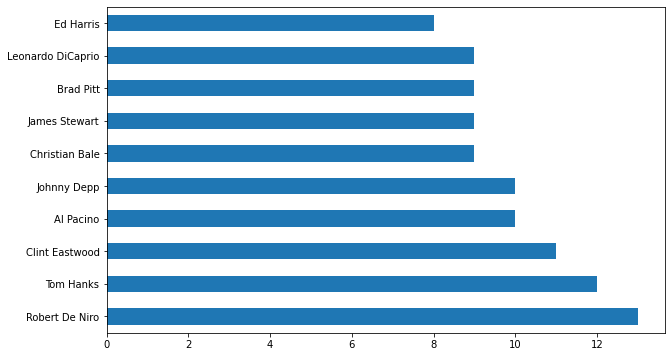

In [31]:
#Most movies by which actors

newdf.Actor.value_counts()[:10].plot(kind = 'barh', figsize = (10,6))

- Robert De Niro has acted in most number of movies - 13 followed by Tom Hanks and Clint Eastwood

### Pattern between genre of movies and top 10 actors who have acted in most number of movies

<AxesSubplot:xlabel='Actor'>

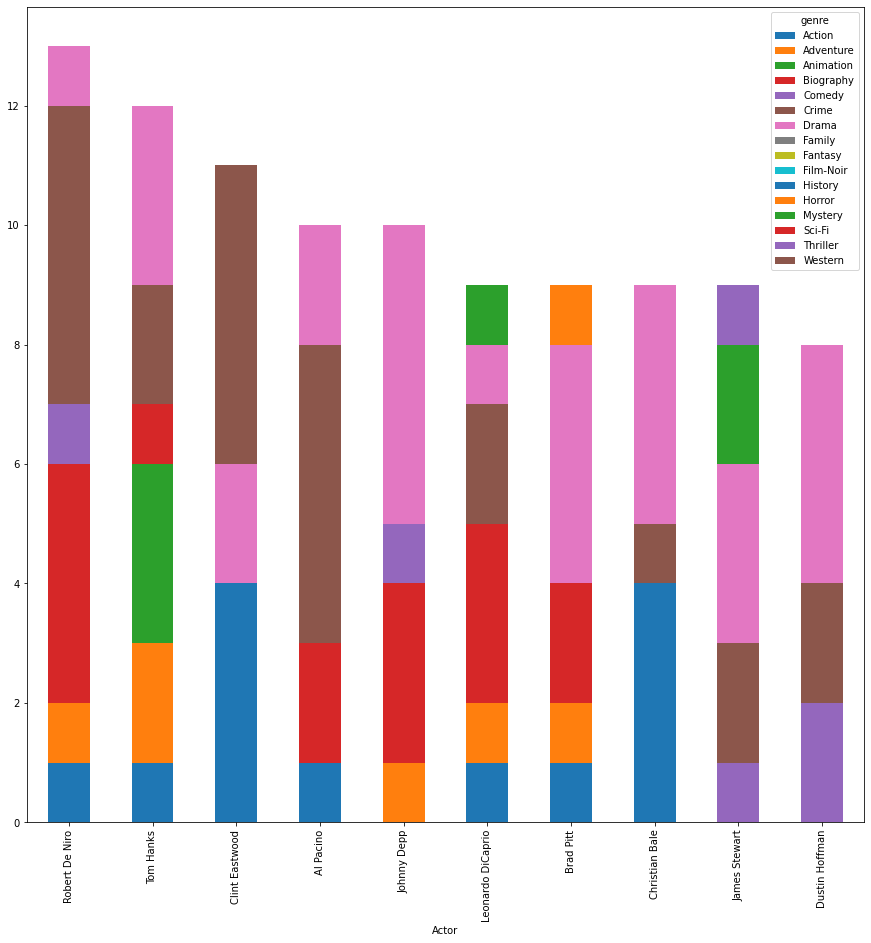

In [32]:
#genre of movies by top 10 actors
tab = pd.crosstab(newdf.Actor, newdf.genre, margins= True).sort_values(by = 'All', ascending = False)
tab.drop('All', axis = 1, inplace = True)
tab.drop('All', axis = 0, inplace = True)
tab[:10].plot(kind = 'bar', figsize = (15,15), stacked = True)

- Except for Denzel Washington, rest top 9 actors all have been part of Dramas i.e. Drama is quite common
- Only 3 out of top 10 have been part of Adventure movies which means Adventure is not very common among these actors
- Only 3 have played roles in Thriller movies
- Genre Sci-Fi and Crime are also quite common with these actors

### Actors who have played the highest number of movies in each Genre

In [33]:
tab1 = pd.crosstab(newdf.Actor, newdf.genre)

dict1 = {}
dict2 = {}

for i in tab1.columns:
    dict1[i] = tab1[i].max()
    dict2[i] = tab1[i].argmax()
dict2

df1 = pd.DataFrame({'Count':dict1,'Actor':dict2})
df1.reset_index(inplace = True)

In [34]:
df1.rename(columns = {'index':'genre'}, inplace = True)

<AxesSubplot:xlabel='Actor', ylabel='Count'>

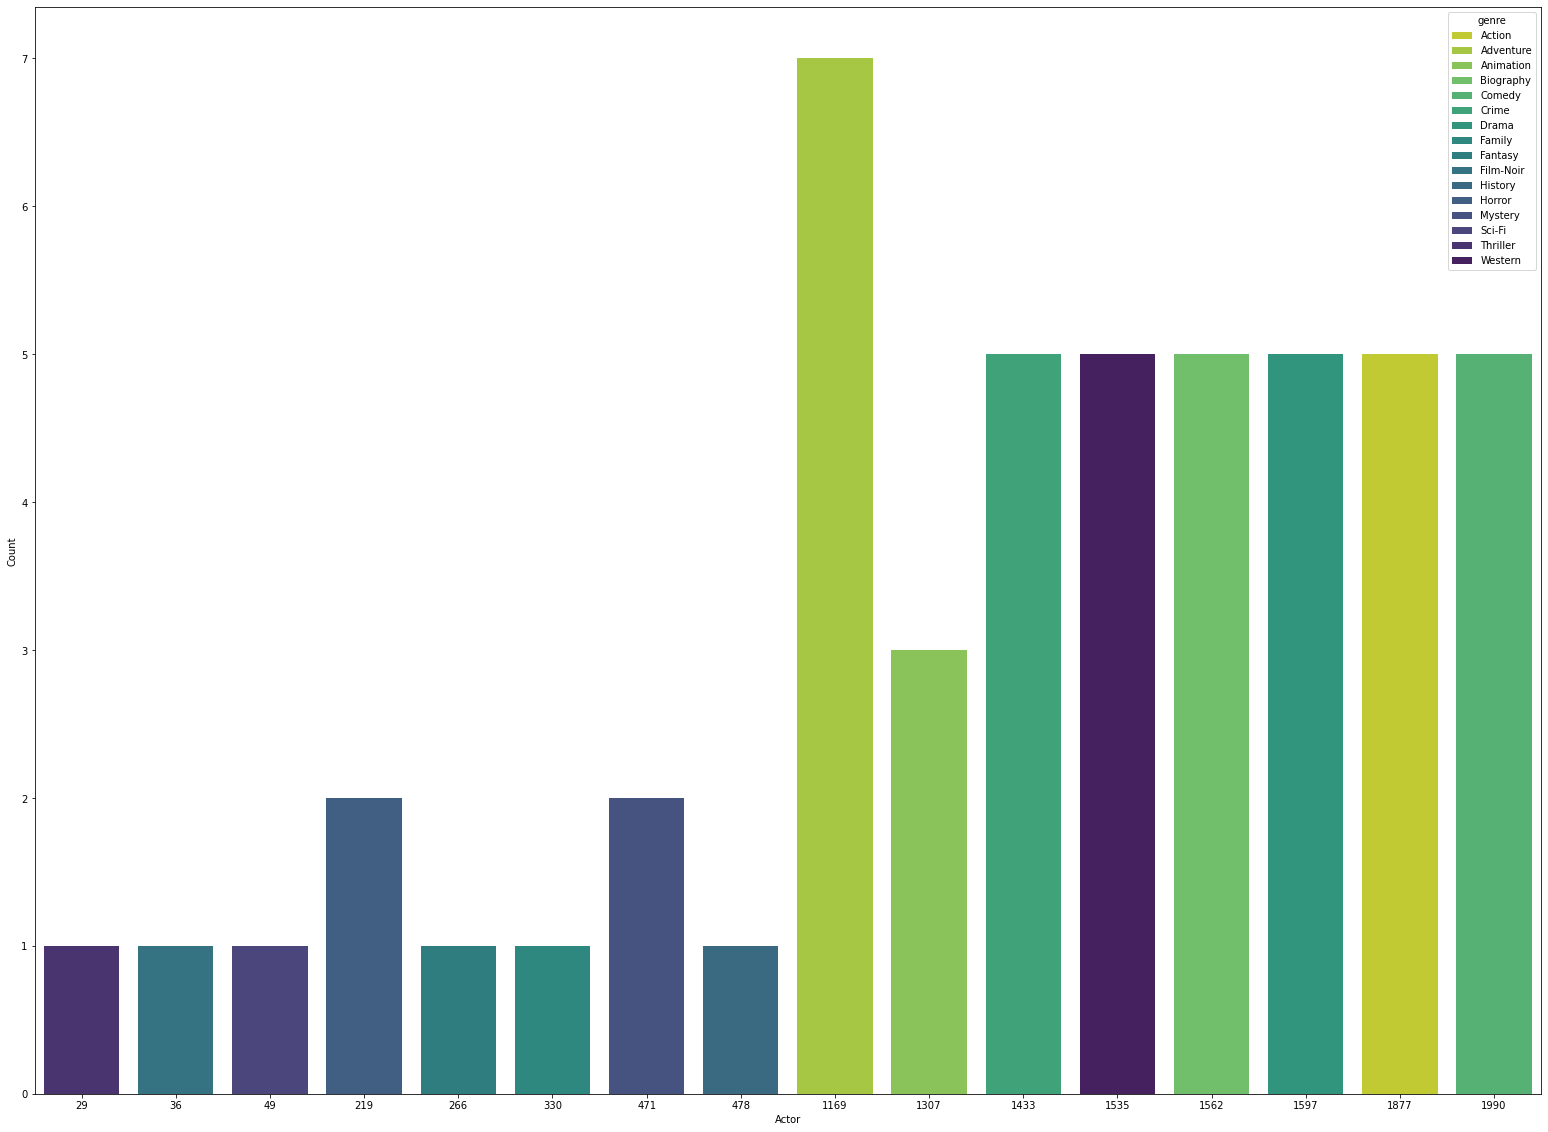

In [35]:
plt.figure(figsize = (27,20))
sns.barplot(x='Actor', y ='Count', data = df1, hue='genre', orient= 'v',
           dodge= False, palette= 'viridis_r') #or we can put the label names as actor names
#dodge = False increases size of width

In [36]:
#total movies in each genre

df.genre.value_counts()

Drama        278
Comedy       156
Action       135
Crime        124
Biography     76
Adventure     74
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

- There have been only 9 Western genre movies out of which Clint Eastwood has been part of 5 which shows his affiliation towards such movies

## Concluding Comments

- There is not a very clear pattern between star_ratings and duration of movies though it is quite clear than very long movies (> 210 mins) generally have low ratings and hence directors should try and make movies which are not too long as they would not help in audience retention for long
- Higher ratings very seen for movies which lasted between 2hrs20mins - 2hrs40mins
- The median rating for Western genres is very high compared to others
- median ratings for Mystery and Film-Noir are also quite high
- Genre family has the least spread with an exact normal distribution
- Mostly movies with >9 ratings belong to genre Crime
- median star rating corresponding to NOT RATED content rating is highest 
- NOT RATED also has highest star rating except when outliers are not considered
- NC-17 content rated has very low star ratings
- for PASSED content rating, 75% movies have star -rating > 8
- the spread for R content rating is very high especially for the latter 50% observations
- Film-Noir, Thriller, Family and Fantasy all are within 2 hours' movies
- Western genre movies mostly range between 110 mins and 175 mins except for one movie which is around 80-90 mins. It has the highest median duration time among all genres
- The longest running movies fall under Drama followed by Crime and Adventure
- Drama genre movies range between 1 hour long to 3 hour long and few even 3.5-4 hour long
